### Here we have email spam data and this data is not single text data in column in column there are complete sentence in text so we will perform bag of words for this  

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_auc_score , roc_curve

#### Import data

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\8th July 2024\\SPAM_text_message.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Preprocessing

#### In NLP , text contains no missing values but this tabular data and we will perform ML model on it so we will go by ML procedure

#### 1.Handling Missing values

In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

#### Here both variable contains object data so there is no make sense to check outliers and Scaling

#### so we directly jump on Data Balancing

In [6]:
df['Category'].value_counts()  / len(df)

ham     0.865937
spam    0.134063
Name: Category, dtype: float64

#### We noticed data is highly imbalance

In [7]:
minority_class = len(df[df['Category']=='spam'])
majority_class = len(df[df['Category']=='ham'])

In [8]:
print(minority_class)
print(majority_class)

747
4825


In [9]:
def Data_balance_check(minority_class , majority_class):
    
    if minority_class * 2 < majority_class:
        
        print('Data is Imabalance')
        
    else:
        
        print('Data is Balance')
    
Data_balance_check(minority_class , majority_class)

Data is Imabalance


#### Here we are not use any kind of oversampling technique or SMOTE technique we doing manually data balance .we will increase count of minority class equal to majority class means we increase duplications in minority class

##### in the context of spam detection with a dataset where each entry contains a full sentence in the "message" column, it's not typical to use standard data balancing techniques like oversampling or SMOTE

##### traditional data balancing techniques like oversampling or SMOTE may not be the best choice for spam detection due to the nature

##### First we split the categories of spam detection data

In [10]:
spam = df[df['Category'] == 'spam']
ham = df[df['Category'] == 'ham']

In [11]:
spam.head(2)

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [12]:
ham.head(2)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [13]:
print('Shape of spam is :' , spam.shape)
print('Shape of ham is :' , ham.shape)

Shape of spam is : (747, 2)
Shape of ham is : (4825, 2)


##### We increase count in spam equal to ham

In [14]:
ham.shape

(4825, 2)

In [15]:
ham.shape[0]  # here we just access 0th index of shape means we want 4825 value for 
              #increasing count equal to it

4825

In [16]:
spam = spam.sample(ham.shape[0] , replace = True)

In [17]:
spam.shape

(4825, 2)

##### Here we increased count equal to ham by just pass count of records of ham

In [18]:
print(spam.shape , ham.shape)

(4825, 2) (4825, 2)


#### We concate it

In [19]:
df = pd.concat([spam , ham] , axis = 0 , ignore_index = True)

In [20]:
df.shape

(9650, 2)

In [21]:
df.head()

,Category,Message
0,spam,Reply to win £100 weekly! What professional sp...
1,spam,YOU ARE CHOSEN TO RECEIVE A £350 AWARD! Pls ca...
2,spam,We tried to contact you re your reply to our o...
3,spam,"Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry ..."
4,spam,Your unique user ID is 1172. For removal send ...


In [22]:
df['Category'].value_counts()

spam    4825
ham     4825
Name: Category, dtype: int64

##### Here we perform bag of words (binary) for text to vector means text to numeric

In [23]:
cv = CountVectorizer()

In [24]:
cv

CountVectorizer()

#### Now we fit and transfer data to binry bow

In [25]:
binary_bow = cv.fit_transform(df['Message'])

In [26]:
binary_bow

<9650x8702 sparse matrix of type '<class 'numpy.int64'>'
	with 163450 stored elements in Compressed Sparse Row format>

#### length of vocabulary (unique words)

In [27]:
len(cv.vocabulary_)

8702

##### It will create 8706 features

#### This is sparse matrix then we will convert to array

In [28]:
df_message = pd.DataFrame(binary_bow.toarray())

In [29]:
df_message.head(2)

,0,1,2,3,4,5,6,7,8,9,...,8692,8693,8694,8695,8696,8697,8698,8699,8700,8701
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### split the data in independent and target data

In [30]:
x = df_message
y = df['Category']

In [31]:
x.head(2)

,0,1,2,3,4,5,6,7,8,9,...,8692,8693,8694,8695,8696,8697,8698,8699,8700,8701
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y.head(2)

0    spam
1    spam
Name: Category, dtype: object

#### split the data into train and test

In [33]:
x_train , x_test , y_train  , y_test = train_test_split(x, y , test_size = 0.25 ,random_state = 23  , stratify = y)

In [34]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(7237, 8702) (2413, 8702) (7237,) (2413,)


#### Now we building model

In [35]:
rf = RandomForestClassifier()

In [36]:
rf

RandomForestClassifier()

#### Train the model

In [37]:
rf.fit(x_train ,y_train)

RandomForestClassifier()

##### Training prediction

In [38]:
y_train_pred = rf.predict(x_train)

In [39]:
y_train_pred

array(['spam', 'spam', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

##### Testing prediction of validation data

In [40]:
y_test_pred = rf.predict(x_test)

In [41]:
y_test_pred

array(['ham', 'ham', 'spam', ..., 'spam', 'spam', 'spam'], dtype=object)

##### Preformance Metrics

#### Training Accuracy

In [42]:
training_accuracy_rf = accuracy_score(y_train, y_train_pred)

In [43]:
training_accuracy_rf

1.0

##### Model get overfitted . may be data is less

#### Testing Prediction

In [44]:
testing_accuracy_rf = accuracy_score(y_test , y_test_pred)

In [45]:
testing_accuracy_rf

0.9995855781185247

##### Confusion matrix

In [46]:
print('confusion matrix of training :')
print(confusion_matrix(y_train , y_train_pred))
print('*****'*20)
print(confusion_matrix(y_test ,y_test_pred))

confusion matrix of training :
[[3619    0]
 [   0 3618]]
****************************************************************************************************
[[1206    0]
 [   1 1206]]


##### Classification report

In [47]:
print('Training Classification report')
print(classification_report(y_train , y_train_pred))
print('****'* 20)
print(classification_report(y_test , y_test_pred))

Training Classification report
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3619
        spam       1.00      1.00      1.00      3618

    accuracy                           1.00      7237
   macro avg       1.00      1.00      1.00      7237
weighted avg       1.00      1.00      1.00      7237

********************************************************************************
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1206
        spam       1.00      1.00      1.00      1207

    accuracy                           1.00      2413
   macro avg       1.00      1.00      1.00      2413
weighted avg       1.00      1.00      1.00      2413



#### Training accuracy is 100 so micro avg is also 100

### XGBOOST

In [48]:
xgb = XGBClassifier()

In [49]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Here first we need to encode , target variable lastly we use randomforest so randomforest having facility if explicitely target variable is not encoded then it handle implicitely but xgboost not

In [50]:
df_category = pd.DataFrame(df['Category'])

In [51]:
df_category.head(2) 

,Category
0,spam
1,spam


### We just manually enocde the spam and ham

In [52]:
df_category[df['Category'] == 'spam'] = 0
df_category[df['Category'] == 'ham'] = 1

#### We check categories count

In [53]:
df_category.value_counts()

Category
0           4825
1           4825
dtype: int64

In [54]:
df_message.head(2)

,0,1,2,3,4,5,6,7,8,9,...,8692,8693,8694,8695,8696,8697,8698,8699,8700,8701
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df_category.head(2)

,Category
0,0
1,0


In [56]:
df_message.shape

(9650, 8702)

In [57]:
df_category.shape

(9650, 1)

In [58]:
df_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Columns: 8702 entries, 0 to 8701
dtypes: int64(8702)
memory usage: 640.7 MB


In [59]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  9650 non-null   object
dtypes: object(1)
memory usage: 75.5+ KB


In [60]:
df_category = df_category.astype('int64')

In [61]:
df_category

,Category
0,0
1,0
2,0
3,0
4,0
...,...
9645,1
9646,1
9647,1
9648,1


In [62]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Category  9650 non-null   int64
dtypes: int64(1)
memory usage: 75.5 KB


#### We split data into train and split

In [63]:
x_train , x_test , y_train, y_test = train_test_split(df_message , df_category , test_size = 0.25 , random_state = 123 , stratify = df_category)

In [64]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(7237, 8702) (2413, 8702) (7237, 1) (2413, 1)


#### Now we fit and  build model

In [65]:
xgb.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Training Prediction

In [66]:
y_train_pred_xgb = xgb.predict(x_train)

In [67]:
print(y_train_pred_xgb)

[0 0 0 ... 0 1 0]


### Testing Prediction

In [68]:
y_test_pred_xgb = xgb.predict(x_test)

In [69]:
y_test_pred_xgb

array([1, 1, 0, ..., 1, 0, 0])

#### Accuracy score

In [70]:
Training_accuracy_xgb = accuracy_score(y_train , y_train_pred_xgb)

In [71]:
Training_accuracy_xgb

0.99557827829211

In [72]:
Testing_accuracy_xgb = accuracy_score(y_test , y_test_pred_xgb)

In [73]:
Testing_accuracy_xgb

0.9917115623704932

In [74]:
print('Training Accuracy of XGBClassifier:' , Training_accuracy_xgb)
print('Testing Accuracy of XGBClassifier :' , Testing_accuracy_xgb)

Training Accuracy of XGBClassifier: 0.99557827829211
Testing Accuracy of XGBClassifier : 0.9917115623704932


### Confusion Matrix

In [75]:
print(confusion_matrix(y_train , y_train_pred_xgb))

[[3596   22]
 [  10 3609]]


#### Here 8(FN)(Type II Error) and 9(FP)(Type I Error) (misslcassification) and 3610(TP) and 3610(TN)

In [76]:
print(confusion_matrix(y_test , y_test_pred_xgb))

[[1194   13]
 [   7 1199]]


##### Here 5(FN) and 9(FP) and 1202(TP) and 1197(TN)

#### Classification Report

In [77]:
print(classification_report(y_train , y_train_pred_xgb))
print('*****'*20)
print(classification_report(y_test , y_test_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3618
           1       0.99      1.00      1.00      3619

    accuracy                           1.00      7237
   macro avg       1.00      1.00      1.00      7237
weighted avg       1.00      1.00      1.00      7237

****************************************************************************************************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1207
           1       0.99      0.99      0.99      1206

    accuracy                           0.99      2413
   macro avg       0.99      0.99      0.99      2413
weighted avg       0.99      0.99      0.99      2413



#### ROC AUC SCore and Curve

In [78]:
roc_auc_score(y_train, y_train_pred_xgb)

0.9955780490870996

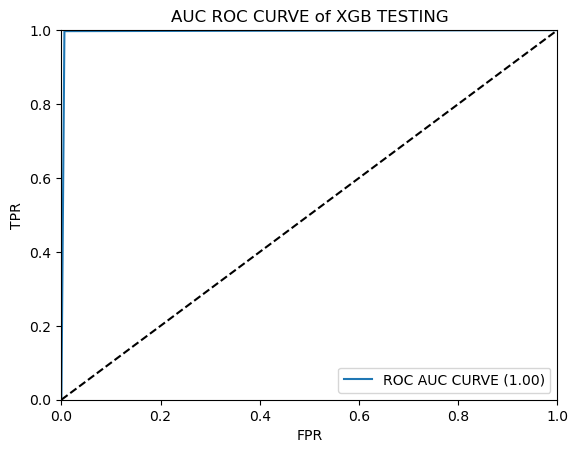

In [79]:
fpr , tpr , threshold = roc_curve(y_train , y_train_pred_xgb)

#ROC CURVE
plt.plot(fpr , tpr , label = 'ROC AUC CURVE (%1.2f)'%roc_auc_score(y_train, y_train_pred_xgb))

#AUC CURVE
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0  , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC CURVE of XGB TESTING')
plt.legend(loc = 'lower right')
plt.show()

#### Testing ROC AUC Curve

0.9917125914201431


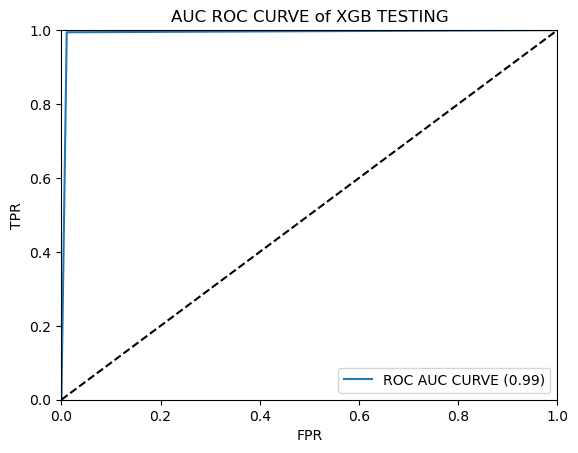

In [80]:
print(roc_auc_score(y_test , y_test_pred_xgb))
fpr , tpr , threshold = roc_curve(y_test , y_test_pred_xgb)

#ROC CURVE
plt.plot(fpr , tpr , label = 'ROC AUC CURVE (%1.2f)'%roc_auc_score(y_test , y_test_pred_xgb))

#AUC CURVE
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0  , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC CURVE of XGB TESTING')
plt.legend(loc = 'lower right')
plt.show()

#### XGBOOST is perform best than randomforest in spam detection case